## Importing Libraries, Loading Data and Verifying

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import json
from PIL import Image


In [ ]:
df_main = pd.read_csv(r'D:\rximage\table.csv')

### Checking Size of the Dataframe and Looking at Some of the Relevant Columns

In [ ]:
df_main.shape

(4392, 18)

In [ ]:
df_images = df_main[['RXNAV 1024', 'name']].copy()
df_images.columns = ['image_path', 'label']

In [ ]:
# Display the first few rows
print(df_images.head())

                                          image_path  \
0  image/images/gallery/1024/00093-0311-01_RXNAVI...   
1  image/images/gallery/1024/00093-3165-01_RXNAVI...   
2  image/images/gallery/1024/00093-0810-01_RXNAVI...   
3  image/images/gallery/1024/00093-0811-01_RXNAVI...   
4  image/images/gallery/1024/00093-0812-01_RXNAVI...   

                                        label  
0  Loperamide Hydrochloride 2 MG Oral Capsule  
1              Minocycline 50 MG Oral Capsule  
2            Nortriptyline 10 MG Oral Capsule  
3            Nortriptyline 25 MG Oral Capsule  
4            Nortriptyline 50 MG Oral Capsule  


## Checking For Duplicates

I think this may be an error after going through all of the pictures, I believe several of the pills are the same medication but the actual pill itself is different. Will find an example and verify

In [ ]:
# Total number of images
total_images = len(df_images)

# Number of unique pills
unique_pills = df_images['label'].nunique()

print(f"Total number of images: {total_images}")
print(f"Number of unique pills: {unique_pills}")

Total number of images: 4392
Number of unique pills: 2111


## Display a Few Pictures of the Images

Just to get an idea of what we are working with

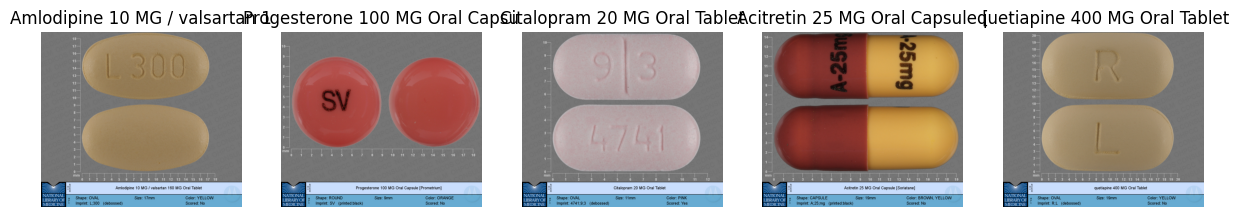

In [ ]:
# Function to show a few images from the dataset
def show_sample_images(df, num_samples=5):
    samples = df.sample(num_samples)
    plt.figure(figsize=(15, 5))
    for i, row in enumerate(samples.itertuples(), 1):
        img = cv2.imread(os.path.join('D:\\rximage', row.image_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.title(row.label[:30])  # Shorten label for display
        plt.axis('off')
    plt.show()

show_sample_images(df_images)

## Get All of the Pill Information into a DataFrame

In [ ]:
# Read the JSON file line by line
data = []
with open(r'D:\rximage\MONGOexport\enum.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

                                    _id  \
0  {'$oid': '5a32f98feb4525ec36eca5e5'}   
1  {'$oid': '5a32f98feb4525ec36eca5e6'}   
2  {'$oid': '5a32f98feb4525ec36eca5e7'}   
3  {'$oid': '5a32f990eb4525ec36eca5e8'}   
4  {'$oid': '5a32f990eb4525ec36eca5e9'}   

                                               color  \
0  [{'name': 'BLACK'}, {'name': 'BLUE'}, {'name':...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               shape  \
0                                                NaN   
1  [{'name': 'BULLET', 'description': 'The shape ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                size  \
0          

In [ ]:
# Function to expand columns containing lists of dictionaries
def expand_column(df, column_name):
    # Drop rows where the column is NaN
    df = df.dropna(subset=[column_name])
    # Reset index to maintain consistency
    df = df.reset_index(drop=True)
    
    # Expand the list of dictionaries into a new DataFrame
    expanded_df = pd.json_normalize(df[column_name].explode())
    
    # Attach the '_id' to keep track of each item
    expanded_df['_id'] = df['_id'].repeat(df[column_name].str.len()).reset_index(drop=True)
    
    return expanded_df

# Expand each relevant column
df_color = expand_column(df, 'color')
df_shape = expand_column(df, 'shape')
df_size = expand_column(df, 'size')
df_score = expand_column(df, 'score')
df_imprint_type = expand_column(df, 'imprintType')
df_imprint_color = expand_column(df, 'imprintColor')
df_collection_name = expand_column(df, 'collectionName')
df_resolution_rxnav = expand_column(df, 'resolutionRxnav')
df_resolution_rxbase = expand_column(df, 'resolutionRxbase')

# Display a preview of the expanded DataFrames
print("Colors:\n", df_color.head())
print("\nShapes:\n", df_shape.head())
print("\nSizes:\n", df_size.head())
print("\nScores:\n", df_score.head())
print("\nImprint Types:\n", df_imprint_type.head())
print("\nImprint Colors:\n", df_imprint_color.head())
print("\nCollection Names:\n", df_collection_name.head())
print("\nResolution Rxnav:\n", df_resolution_rxnav.head())
print("\nResolution Rxbase:\n", df_resolution_rxbase.head())

Colors:
     name                                   _id
0  BLACK  {'$oid': '5a32f98feb4525ec36eca5e5'}
1   BLUE  {'$oid': '5a32f98feb4525ec36eca5e5'}
2  BROWN  {'$oid': '5a32f98feb4525ec36eca5e5'}
3   GRAY  {'$oid': '5a32f98feb4525ec36eca5e5'}
4  GREEN  {'$oid': '5a32f98feb4525ec36eca5e5'}

Shapes:
             name                                        description  \
0         BULLET  The shape of a cylinder when viewing the capsu...   
1        CAPSULE  The shape of a capsule when viewing the capsul...   
2         CLOVER  The stylized shape, of clover, having three or...   
3        DIAMOND  The shape has four distinct sides making a par...   
4  DOUBLE CIRCLE  The shape of two circles joined together, and ...   

                                    _id  
0  {'$oid': '5a32f98feb4525ec36eca5e6'}  
1  {'$oid': '5a32f98feb4525ec36eca5e6'}  
2  {'$oid': '5a32f98feb4525ec36eca5e6'}  
3  {'$oid': '5a32f98feb4525ec36eca5e6'}  
4  {'$oid': '5a32f98feb4525ec36eca5e6'}  

Sizes:
   name     

In [ ]:
# Function to clean the _id column by extracting the oid value
def clean_oid_column(df):
    df['_id'] = df['_id'].apply(lambda x: x.get('$oid') if isinstance(x, dict) else x)
    return df

# Apply cleaning to each expanded DataFrame
df_color = clean_oid_column(df_color)
df_shape = clean_oid_column(df_shape)
df_size = clean_oid_column(df_size)
df_score = clean_oid_column(df_score)
df_imprint_type = clean_oid_column(df_imprint_type)
df_imprint_color = clean_oid_column(df_imprint_color)
df_collection_name = clean_oid_column(df_collection_name)
df_resolution_rxnav = clean_oid_column(df_resolution_rxnav)
df_resolution_rxbase = clean_oid_column(df_resolution_rxbase)

# Preview the cleaned DataFrames
print("Colors:\n", df_color.head())
print("\nShapes:\n", df_shape.head())
print("\nSizes:\n", df_size.head())
print("\nScores:\n", df_score.head())
print("\nImprint Types:\n", df_imprint_type.head())
print("\nImprint Colors:\n", df_imprint_color.head())
print("\nCollection Names:\n", df_collection_name.head())
print("\nResolution Rxnav:\n", df_resolution_rxnav.head())
print("\nResolution Rxbase:\n", df_resolution_rxbase.head())

Colors:
     name                       _id
0  BLACK  5a32f98feb4525ec36eca5e5
1   BLUE  5a32f98feb4525ec36eca5e5
2  BROWN  5a32f98feb4525ec36eca5e5
3   GRAY  5a32f98feb4525ec36eca5e5
4  GREEN  5a32f98feb4525ec36eca5e5

Shapes:
             name                                        description  \
0         BULLET  The shape of a cylinder when viewing the capsu...   
1        CAPSULE  The shape of a capsule when viewing the capsul...   
2         CLOVER  The stylized shape, of clover, having three or...   
3        DIAMOND  The shape has four distinct sides making a par...   
4  DOUBLE CIRCLE  The shape of two circles joined together, and ...   

                        _id  
0  5a32f98feb4525ec36eca5e6  
1  5a32f98feb4525ec36eca5e6  
2  5a32f98feb4525ec36eca5e6  
3  5a32f98feb4525ec36eca5e6  
4  5a32f98feb4525ec36eca5e6  

Sizes:
   name                       _id
0    4  5a32f98feb4525ec36eca5e7
1    5  5a32f98feb4525ec36eca5e7
2    6  5a32f98feb4525ec36eca5e7
3    7  5a32f98feb4525e

In [ ]:
# Merge each cleaned DataFrame into the main DataFrame `rximages_df`
df_merged = rximages_df.copy()

# List of the DataFrames to merge
dfs_to_merge = [df_color, df_shape, df_size, df_score, df_imprint_type, df_imprint_color, df_collection_name, df_resolution_rxnav, df_resolution_rxbase]

# Merge them one by one with suffixes to handle duplicate columns
for df in dfs_to_merge:
    df_merged = pd.merge(df_merged, df, how='left', on='_id', suffixes=('', '_merged'))

# Preview the merged dataframe
print(df_merged.head())

           ndc11  part   rxcui     acqDate  \
0  63459-0502-30     1  261106  09-26-2013   
1  63459-0504-30     1  262219  09-26-2013   
2  63459-0506-30     1  261107  09-26-2013   
3  63459-0508-30     1  261108  09-26-2013   
4  63459-0512-30     1  261109  09-26-2013   

                                   name         labeler deaSchedule  \
0  Fentanyl 0.2 MG Oral Lozenge [Actiq]  Cephalon, Inc.         CII   
1  Fentanyl 0.4 MG Oral Lozenge [Actiq]  Cephalon, Inc.         CII   
2  Fentanyl 0.6 MG Oral Lozenge [Actiq]  Cephalon, Inc.         CII   
3  Fentanyl 0.8 MG Oral Lozenge [Actiq]  Cephalon, Inc.         CII   
4  Fentanyl 1.2 MG Oral Lozenge [Actiq]  Cephalon, Inc.         CII   

                                         attribution  ingredientsAvailable  \
0  National Library of Medicine | Lister Hill Nat...                 False   
1  National Library of Medicine | Lister Hill Nat...                 False   
2  National Library of Medicine | Lister Hill Nat...          

In [ ]:
print(df_merged.shape) 

(4392, 58)


In [ ]:
df_merged.columns

Index(['ndc11', 'part', 'rxcui', 'acqDate', 'name', 'labeler', 'deaSchedule',
       'attribution', 'ingredientsAvailable', 'rxnavImageObjectId',
       'rxnavImageFileName', 'rxnavImageSize', 'nlmImageObjectId',
       'nlmImageFileName', 'nlmImageSize', 'rxnavImageSizeFull',
       'nlmImageSizeFull', 'imageSize', 'rxnavImageSize1024',
       'rxnavImageSize800', 'nlmImageSize800', 'rxnavImageSize600',
       'nlmImageSize600', 'rxnavImageSize300', 'nlmImageSize300',
       'rxnavImageSize120', 'nlmImageSize120', '_id', 'mpc.shape', 'mpc.size',
       'mpc.color', 'mpc.imprint', 'mpc.imprintColor', 'mpc.imprintType',
       'mpc.symbol', 'mpc.score', 'ingredients.active', 'ingredients.inactive',
       'relabelersNdc9', 'status', 'splSetId', 'splRootId', 'splVersion',
       'name_merged', 'name_merged', 'description', 'name_merged',
       'name_merged', 'description_merged', 'name_merged',
       'description_merged', 'name_merged', 'name_merged',
       'description_merged', 'name

In [ ]:
# Example: View a random row
df_merged.sample(1)

,ndc11,part,rxcui,acqDate,name,labeler,deaSchedule,attribution,ingredientsAvailable,rxnavImageObjectId,...,description_merged,name_merged,description_merged,name_merged,name_merged,description_merged,name_merged,description_merged,name_merged,description_merged
1983,43547-0330-03,1,310792,07-15-2015,Hydrochlorothiazide 12.5 MG / irbesartan 150 M...,"Solco Healthecare US, LLC",NaN,National Library of Medicine | Lister Hill Nat...,False,185692973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Making sure these columns can be tossed

In [ ]:
nan_count = df_merged['description_merged'].isna().sum()
print(f"Number of NaN values in 'color' column: {nan_count}")

Number of NaN values in 'color' column: description_merged    4392
description_merged    4392
description_merged    4392
description_merged    4392
description_merged    4392
dtype: int64


In [ ]:
# Remove columns with more than 100 NaN values
df_cleaned = df_merged.dropna(axis=1, thresh=len(df_merged) - 100)
print(df_cleaned.columns)

Index(['ndc11', 'part', 'rxcui', 'acqDate', 'name', 'labeler', 'attribution',
       'ingredientsAvailable', 'rxnavImageObjectId', 'rxnavImageFileName',
       'rxnavImageSize', 'nlmImageObjectId', 'nlmImageFileName',
       'nlmImageSize', 'rxnavImageSizeFull', 'nlmImageSizeFull', 'imageSize',
       'rxnavImageSize1024', 'rxnavImageSize800', 'nlmImageSize800',
       'rxnavImageSize600', 'nlmImageSize600', 'rxnavImageSize300',
       'nlmImageSize300', 'rxnavImageSize120', 'nlmImageSize120', '_id',
       'mpc.shape', 'mpc.size', 'mpc.color', 'mpc.imprint', 'mpc.imprintType',
       'mpc.symbol', 'mpc.score', 'ingredients.active',
       'ingredients.inactive'],
      dtype='object')


In [ ]:
df_cleaned.sample(1)

,ndc11,part,rxcui,acqDate,name,labeler,attribution,ingredientsAvailable,rxnavImageObjectId,rxnavImageFileName,...,_id,mpc.shape,mpc.size,mpc.color,mpc.imprint,mpc.imprintType,mpc.symbol,mpc.score,ingredients.active,ingredients.inactive
1462,00093-1024-06,1,1098649,12-19-2012,Nefazodone hydrochloride 100 MG Oral Tablet,Teva Pharmaceuticals USA Inc,National Library of Medicine | Lister Hill Nat...,True,185655680,00093-1024-06_RXNAVIMAGE10_8E29C77E.jpg,...,5a32f697eb4525ea9e82c499,OVAL,12,WHITE,1024;93,DEBOSSED,False,2,[nefazodone hydrochloride 100 mg],"[silicon dioxide, magnesium stearate, cellulos..."


In [ ]:
# Example: Rename specific columns
df_cleaned = df_cleaned.rename(columns={
    'mpc.shape': 'shape',
    'mpc.size': 'size',
    'mpc.color': 'color',
    'mpc.imprint': 'imprint',
    'mpc.imprintColor': 'imprintColor',
    'mpc.imprintType': 'imprintType',
    'mpc.symbol': 'symbol',
    'mpc.score': 'score'
})

In [ ]:
df_cleaned.head()

,ndc11,part,rxcui,acqDate,name,labeler,attribution,ingredientsAvailable,rxnavImageObjectId,rxnavImageFileName,...,_id,shape,size,color,imprint,imprintType,symbol,score,ingredients.active,ingredients.inactive
0,63459-0502-30,1,261106,09-26-2013,Fentanyl 0.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",National Library of Medicine | Lister Hill Nat...,False,185688930,63459-0502-30_RXNAVIMAGE10_8641C37E.jpg,...,5a32f687eb4525ea9e82bee3,BULLET,19,WHITE,ACTIQ;200,PRINTED,False,1,[],[]
1,63459-0504-30,1,262219,09-26-2013,Fentanyl 0.4 MG Oral Lozenge [Actiq],"Cephalon, Inc.",National Library of Medicine | Lister Hill Nat...,False,185688934,63459-0504-30_RXNAVIMAGE10_8841C43E.jpg,...,5a32f687eb4525ea9e82bee4,BULLET,19,WHITE,ACTIQ;400,PRINTED,False,1,[],[]
2,63459-0506-30,1,261107,09-26-2013,Fentanyl 0.6 MG Oral Lozenge [Actiq],"Cephalon, Inc.",National Library of Medicine | Lister Hill Nat...,False,185688937,63459-0506-30_RXNAVIMAGE10_8941C4CE.jpg,...,5a32f687eb4525ea9e82bee5,BULLET,19,WHITE,ACTIQ;600,PRINTED,False,1,[],[]
3,63459-0508-30,1,261108,09-26-2013,Fentanyl 0.8 MG Oral Lozenge [Actiq],"Cephalon, Inc.",National Library of Medicine | Lister Hill Nat...,False,185688938,63459-0508-30_RXNAVIMAGE10_8941C4FE.jpg,...,5a32f687eb4525ea9e82bee6,BULLET,19,WHITE,ACTIQ;800,PRINTED,False,1,[],[]
4,63459-0512-30,1,261109,09-26-2013,Fentanyl 1.2 MG Oral Lozenge [Actiq],"Cephalon, Inc.",National Library of Medicine | Lister Hill Nat...,False,185688940,63459-0512-30_RXNAVIMAGE10_8A41C55E.jpg,...,5a32f687eb4525ea9e82bee7,BULLET,19,WHITE,ACTIQ;1200,PRINTED,False,1,[],[]


## Finding the Size of the Crop Box

I want to remove the label on the bottom of the image and ideally the markers for measurement from each picture, this will hopefully make it easier to manipulate the images to create and artificial dataset by rotating the pills and pasting them on different backgrounds

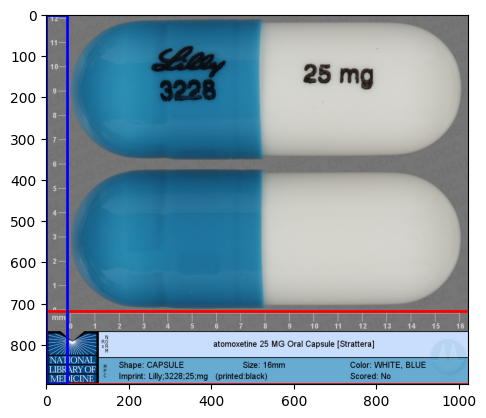

In [ ]:


def show_crop_area(image, bottom_crop_box, left_crop_box):
    # Display the image
    plt.imshow(image)
    
    # Draw the bottom crop area
    plt.gca().add_patch(plt.Rectangle(
        (bottom_crop_box[0], bottom_crop_box[1]), 
        bottom_crop_box[2] - bottom_crop_box[0], 
        bottom_crop_box[3] - bottom_crop_box[1], 
        linewidth=2, edgecolor='r', facecolor='none'
    ))
    
    # Draw the left crop area
    plt.gca().add_patch(plt.Rectangle(
        (left_crop_box[0], left_crop_box[1]), 
        left_crop_box[2] - left_crop_box[0], 
        left_crop_box[3] - left_crop_box[1], 
        linewidth=2, edgecolor='b', facecolor='none'
    ))

    plt.show()


with Image.open('D:/rximage/image/images/gallery/1024/00002-3228-30_RXNAVIMAGE10_391E1C80.jpg') as img:
    bottom_crop_box, left_crop_box = calculate_crop_boxes(img)  # Get the two crop boxes
    show_crop_area(img, bottom_crop_box, left_crop_box)  # Show the crop areas

After looking at several of the images the label on the bottom is indeed universal for every picture, but the marks on the side for measuring appear in different locations therefor I will only be cropping out the label at this moment

## Cropping Out the Labels on the Bottom of the Images

In [ ]:
import os
from PIL import Image

def calculate_top_crop_box(image, top_percentage=0.8):
    width, height = image.size

    # Calculate the crop box for the top 80% of the image
    top_crop_height = int(height * top_percentage)  # 80% from the top
    bottom_crop_height = height - top_crop_height    # Remaining 20% (bottom)

    # Define the crop box for the top 80%
    top_crop_box = (0, 0, width, top_crop_height)

    return top_crop_box

def crop_and_save_images(input_folder, output_folder, top_percentage=0.8):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Iterate over each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
            image_path = os.path.join(input_folder, filename)
            with Image.open(image_path) as img:
                # Get the crop box for the top 80% portion
                top_crop_box = calculate_top_crop_box(img, top_percentage)
                
                # Crop the top 80% of the image
                top_img = img.crop(top_crop_box)
                
                # Save the cropped top portion (80% remaining part)
                top_output_path = os.path.join(output_folder, f"{filename}")
                top_img.save(top_output_path)
                print(f"Saved cropped top image: {top_output_path}")


input_folder = 'D:/rximage/image/images/gallery/1024'
output_folder = 'D:/rximage/image/images/cropped'
crop_and_save_images(input_folder, output_folder, top_percentage=0.8)

Saved cropped top image: D:/rximage/image/images/cropped\00002-3228-30_RXNAVIMAGE10_391E1C80.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3229-30_RXNAVIMAGE10_3E1E1F50.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3235-60_RXNAVIMAGE10_1B158D9C.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3238-30_RXNAVIMAGE10_361E1B30.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3239-30_RXNAVIMAGE10_3F1E1F80.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3240-30_RXNAVIMAGE10_A91354BA.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3250-30_RXNAVIMAGE10_431E21C1.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3251-30_RXNAVIMAGE10_451E2281.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-3270-30_RXNAVIMAGE10_A91354EA.jpg
Saved cropped top image: D:/rximage/image/images/cropped\00002-4165-02_RXNAVIMAGE10_EF3AF7C7.jpg
Saved cropped top image: D:/rx

## Image Splitting

I want to split each picture in half to isolate each side of each pill. I don't think we should be training a model on each pill placed side by side in exactly the same fashion as any deviation in the real world could create errors. Splitting the pills also allows me to remove the background and augment the dataset to produce more images from the one we have.

In order to do this I noticed that there are the pictures all fall into one of two catagories

They are either pictured vertically, with one side located above the other

Or the are pictured Horizontally with one side depicted adjacent to the other

I was unable to come up with a programatic approach that would successfully split all of the images so I manually sorted all 4,300 or so images and seperated them

pills that are stacked vertically are stored in D:\rximage\image\images\vertical

pills that are stacked horizontally are stored in D:\rximage\image\images\horizontal